# Feature Engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.rcParams["figure.figsize"] = [10, 6]

In [ ]:
# Load dataset
movies = pd.read_csv(
    "https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/imdb_dataset.csv"
)
movies.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,NaN,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,NaN,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,NaN,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,NaN,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NaN,Drama,96.0,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161.0,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195.0,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139.0,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


## Missing values

In [ ]:
movies.isna().sum()

star_rating        1
title              0
content_rating     1
genre              1
duration          19
actors_list        0
dtype: int64

In [ ]:
print(movies.shape)
movies = movies.dropna(subset=["genre", "duration"])
print(movies.shape)

(979, 6)
(959, 6)


In [ ]:
movies.isna().sum()

star_rating       1
title             0
content_rating    1
genre             0
duration          0
actors_list       0
dtype: int64

## Outliers

### Discover with Histogram

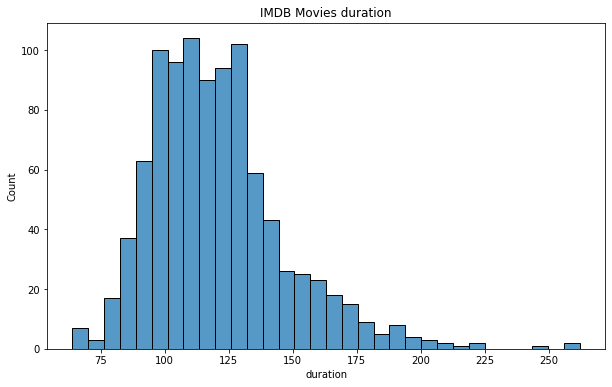

In [ ]:
sns.histplot(movies["duration"]).set_title("IMDB Movies duration")
plt.show()

### Discover with BoxPlot

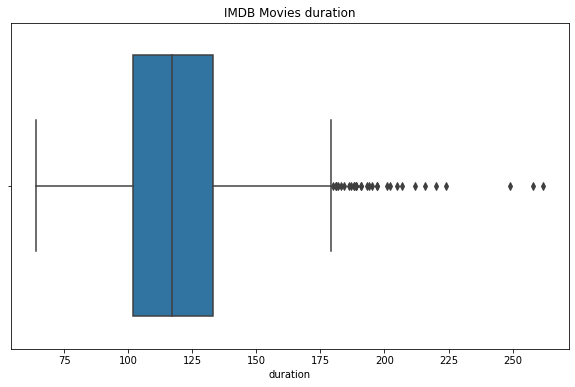

In [ ]:
sns.boxplot(data=movies, x="duration").set_title("IMDB Movies duration")
plt.show()

In [ ]:
q1 = np.percentile(movies["duration"], 25)
q3 = np.percentile(movies["duration"], 75)
iqr = q3 - q1

q3 + 1.5 * iqr

179.5

In [ ]:
mean = movies["duration"].mean()
std = movies["duration"].std()

# Normalize the data using Z-Scores:
movies["duration_sigmas"] = (movies["duration"] - mean) / std

In [ ]:
movies[(movies["duration_sigmas"] > 3) | (movies["duration_sigmas"] < -3)]

,star_rating,title,content_rating,genre,duration,actors_list,duration_sigmas
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",3.037894
17,8.7,Seven Samurai,UNRATED,Drama,207.0,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...",3.265061
78,8.4,Once Upon a Time in America,R,Crime,249.0,"[u'Robert De Niro', u'James Woods', u'Elizabet...",4.855229
85,8.4,Lawrence of Arabia,PG,Adventure,216.0,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony...",3.605811
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224.0,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell...",3.908700
157,8.2,Gone with the Wind,G,Drama,258.0,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...",5.195979
204,8.1,Ben-Hur,G,Adventure,212.0,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe...",3.454366
445,7.9,The Ten Commandments,APPROVED,Adventure,220.0,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba...",3.757256
476,7.8,Hamlet,PG-13,Drama,262.0,"[u'Kenneth Branagh', u'Julie Christie', u'Dere...",5.347424
630,7.7,Malcolm X,PG-13,Biography,202.0,"[u'Denzel Washington', u'Angela Bassett', u'De...",3.075755


## Categorical Features

In [ ]:
movies[["title", "genre"]]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,NaN
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


In [ ]:
movies.shape

(979, 6)

In [ ]:
movies_dummies = pd.get_dummies(movies, columns=["genre"])
movies_dummies.head()

,star_rating,title,content_rating,duration,actors_list,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,...,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_History,genre_Horror,genre_Mystery,genre_Sci-Fi,genre_Thriller,genre_Western
0,9.3,The Shawshank Redemption,R,NaN,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,The Godfather,R,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.1,The Godfather: Part II,R,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9.0,The Dark Knight,PG-13,NaN,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.9,Pulp Fiction,R,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Binning

In [ ]:
duration_bins = pd.cut(movies["duration"], bins=10)
duration_bins

1      (163.0, 182.8]
4      (143.2, 163.0]
5       (83.8, 103.6]
6      (143.2, 163.0]
7      (182.8, 202.6]
            ...      
974    (103.6, 123.4]
975    (103.6, 123.4]
976    (123.4, 143.2]
977    (103.6, 123.4]
978    (123.4, 143.2]
Name: duration, Length: 959, dtype: category
Categories (10, interval[float64, right]): [(63.802, 83.8] < (83.8, 103.6] < (103.6, 123.4] <
                                            (123.4, 143.2] ... (182.8, 202.6] < (202.6, 222.4] <
                                            (222.4, 242.2] < (242.2, 262.0]]

In [ ]:
duration_bins.value_counts()

(103.6, 123.4]    321
(83.8, 103.6]     228
(123.4, 143.2]    226
(143.2, 163.0]     84
(163.0, 182.8]     41
(63.802, 83.8]     32
(182.8, 202.6]     18
(202.6, 222.4]      5
(242.2, 262.0]      3
(222.4, 242.2]      1
Name: duration, dtype: int64

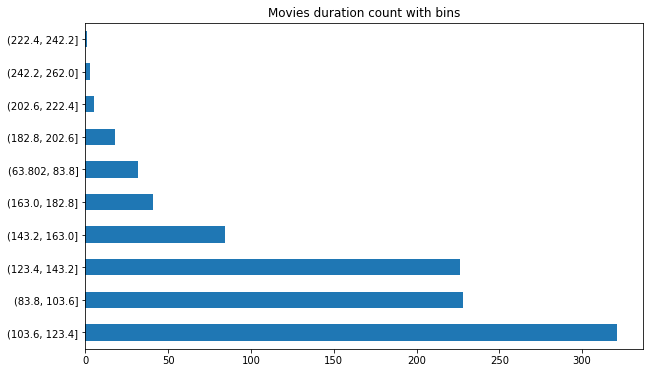

In [ ]:
duration_bins.value_counts().plot(kind="barh").set_title(
    "Movies duration count with bins"
)
plt.show()

## Feature normalization

### Min-Max

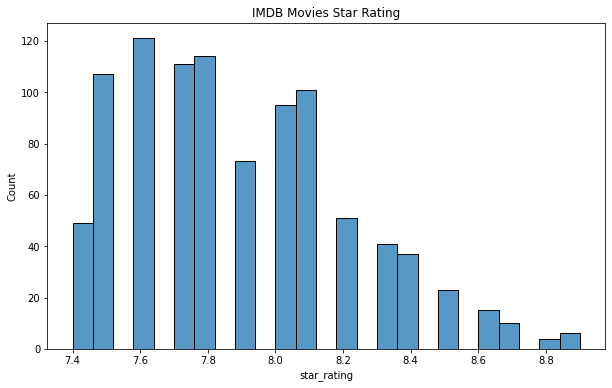

In [ ]:
sns.histplot(movies["star_rating"], bins=25).set_title("IMDB Movies Star Rating")
plt.show()

In [ ]:
# define the scaler and fit it
mm_scaler = MinMaxScaler(feature_range=(0, 1), clip=False)
mm_scaler.fit(X_train["PTS"].values.reshape(-1, 1))


# transform x_train
X_train["PTS"] = mm_scaler.transform(X_train["PTS"].values.reshape(-1, 1))

# transform X_test
X_test["PTS"] = mm_scaler.transform(X_test["PTS"].values.reshape(-1, 1))

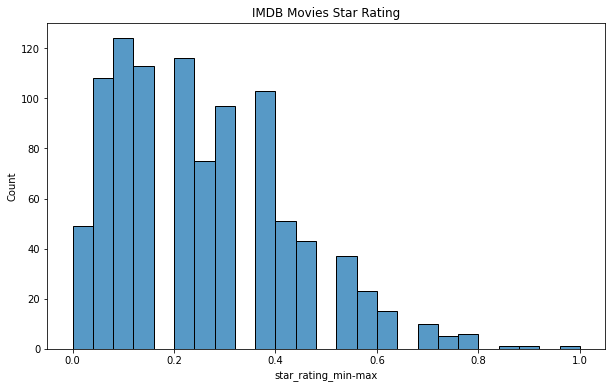

In [ ]:
sns.histplot(movies["star_rating_min-max"], bins=25).set_title(
    "IMDB Movies Star Rating"
)
plt.show()

#### Store to disk

In [ ]:
import pickle

# Write to disk using pickle
with open("mm_scaler.pkl", "wb") as f:
    pickle.dump(mm_scaler, f)

# Load later from disk
with open("mm_scaler.pkl", "rb") as f:
    mm_scaler_loaded = pickle.load(f)

In [ ]:
# Test both objets output same results
print(mm_scaler_loaded.transform([[7.8]]))
print(mm_scaler.transform([[7.8]]))

[[0.26666667]]
[[0.26666667]]


We can see the data has the same distribution.

Now, what happens if we try to scale data values which are out of our sample distribution but still valid values?

In [ ]:
mm_scaler.transform([[3]])

array([[-2.93333333]])

In [ ]:
mm_scaler.transform([[5]])

array([[-1.6]])

In [ ]:
mm_scaler.transform([[9.3]])

array([[1.26666667]])

What if `clip=True`?

In [ ]:
mm_scaler = MinMaxScaler(feature_range=(0, 1), clip=True)
mm_scaler.fit(movies["star_rating"].values.reshape(-1, 1))

MinMaxScaler(clip=True)

In [ ]:
MinMaxScaler??

In [ ]:
mm_scaler.transform([[3]])

array([[0.]])

In [ ]:
mm_scaler.transform([[5]])

array([[0.]])

In [ ]:
mm_scaler.transform([[9.3]])

array([[1.]])

In [ ]:
mm_scaler.transform([[9.5]])

array([[1.]])

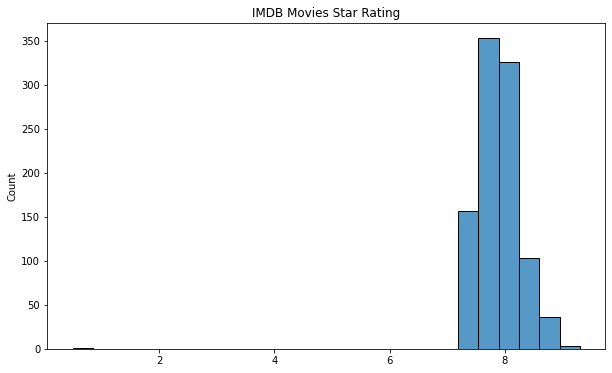

In [ ]:
new_star_rating = movies["star_rating"].tolist()
new_star_rating.append(0.5)

sns.histplot(new_star_rating, bins=25).set_title("IMDB Movies Star Rating")
plt.show()

In [ ]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))
new_star_rating_mm = mm_scaler.fit_transform(np.array(new_star_rating).reshape(-1, 1))

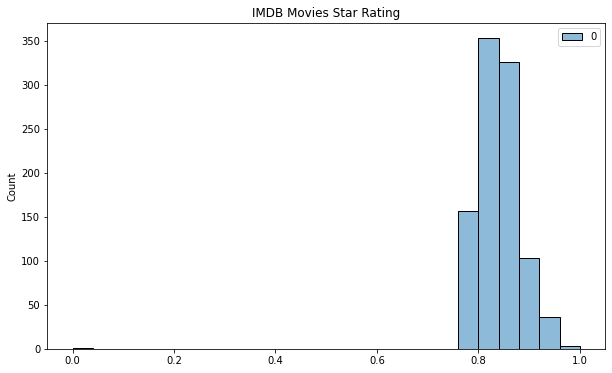

In [ ]:
sns.histplot(new_star_rating_mm, bins=25).set_title("IMDB Movies Star Rating")
plt.show()

### Z-Score

In [ ]:
movies["star_rating"].describe()

count    958.000000
mean       7.883925
std        0.326874
min        7.400000
25%        7.600000
50%        7.800000
75%        8.100000
max        8.900000
Name: star_rating, dtype: float64

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(movies["star_rating"].values.reshape(-1, 1))

movies["star_rating_std"] = std_scaler.transform(
    movies["star_rating"].values.reshape(-1, 1)
)

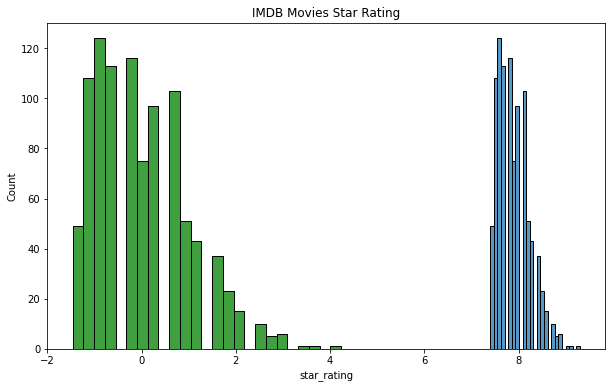

In [ ]:
sns.histplot(movies["star_rating"], bins=25)
sns.histplot(movies["star_rating_std"], bins=25, color="g").set_title(
    "IMDB Movies Star Rating"
)
plt.show()

In [ ]:
sr_mean = movies["star_rating"].mean()
sr_std = movies["star_rating"].std()
sr_scaled = (movies["star_rating"] - sr_mean) / sr_std

In [ ]:
sr_scaled[0]

4.231080582801198

In [ ]:
movies["star_rating_std"].iloc[0]

4.233245372189598

In [ ]:
std_scaler.transform([[3]])

array([[-14.66042941]])

In [ ]:
(3 - sr_mean) / sr_std

-14.652932385595246

In [ ]:
std_scaler.transform([[5]])

array([[-8.82733985]])

In [ ]:
std_scaler.transform([[9.5]])

array([[4.94660763]])

In [ ]:
std_scaler = StandardScaler()

In [ ]:
std_scaler.fit(movies["star_rating"].values.reshape(-1, 1))

StandardScaler()

In [ ]:
std_scaler.transform(np.array([2.0, 8, 10, 20]).reshape(-1, 1))

array([[-17.65942541],
       [  0.33455058],
       [  6.33254257],
       [ 36.32250254]])

In [ ]:
std_scaler.fit_transform(movies["star_rating"].values.reshape(-1, 1))

array([[ 4.23324537],
       [        nan],
       [ 3.63344617],
       [ 3.33354657],
       [ 3.03364697],
       [ 3.03364697],
       [ 3.03364697],
       [ 3.03364697],
       [ 3.03364697],
       [ 3.03364697],
       [ 2.73374737],
       [ 2.73374737],
       [ 2.73374737],
       [ 2.73374737],
       [ 2.73374737],
       [ 2.43384777],
       [ 2.43384777],
       [ 2.43384777],
       [ 2.43384777],
       [ 2.43384777],
       [ 2.43384777],
       [ 2.43384777],
       [ 2.43384777],
       [ 2.43384777],
       [ 2.43384777],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 2.13394817],
       [ 1.83404857],
       [ 1.83404857],
       [ 1.83404857],
       [ 1.83404857],
       [ 1.83404857],
       [ 1

In [ ]:
std_scaler.fit(movies["star_rating"].values.reshape(-1, 1))

In [ ]:
std_scaler.transform(movies["star_rating"].values.reshape(-1, 1))